In [2]:
import preprocessing
import postprocessing
import net
from config import patch_data_path as PATH
import numpy as np


In [3]:
ad = preprocessing.AneurysmData(PATH)

In [4]:
%load_ext autoreload
%autoreload 2
%aimport net

In [15]:
from matplotlib import pyplot as plt

def plot_overlap(target_mask, predicted_mask):
    import matplotlib.pyplot as plt
    N=4
    image = target_mask
    mask = predicted_mask>0.5
    plt.figure(dpi=800)
    plt.rcParams['figure.figsize'] = [20,20]
    fig, ax = plt.subplots(nrows=N, ncols=N)
    for i in range(N):
        for j in range(N):
            im = image[i+j*N+5,:,:]
            m = mask[i+j*N+5,:,:]
            ax[i,j].imshow(im,alpha=0.4,cmap="Greys_r",vmin=0,vmax=1)
            ax[i,j].imshow(m,alpha=0.6, cmap="cividis",vmin=0,vmax=1)
    return fig

[0]


<Figure size 16000x16000 with 0 Axes>

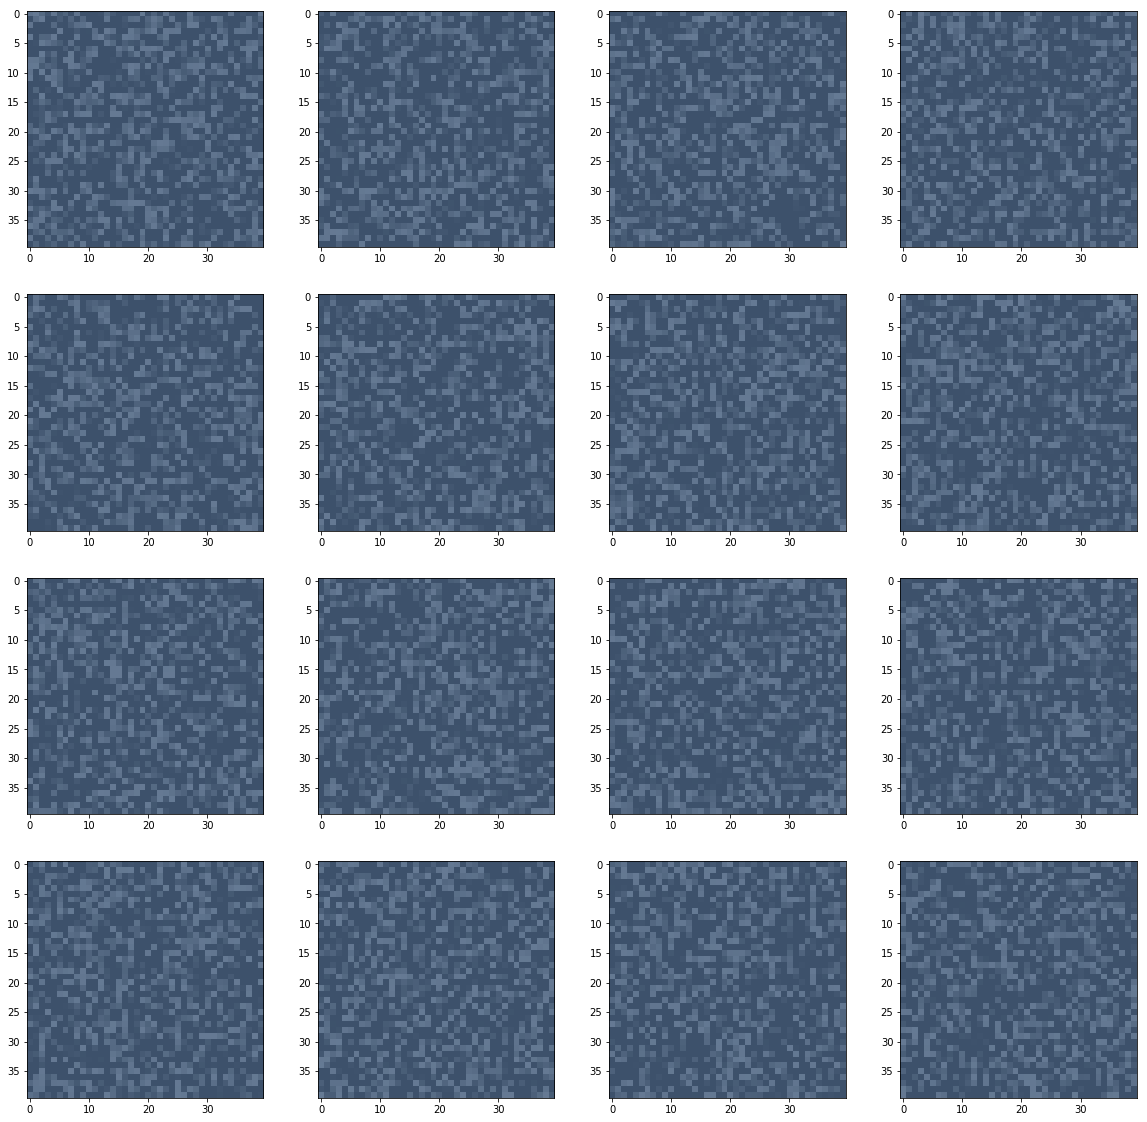

In [29]:
result = model.predict(x[1:2])
source = x[1:2].reshape((40,40,40))
target = y[1:2].reshape((40,40,40))
result = result.reshape((40,40,40))
plot_overlap(source, target)
print()

In [19]:
model = net.conv_model_simple()
x = ad.images = ad.load(ad.paths_image,1000)
y = ad.masks = ad.load(ad.paths_mask,1000)
x = np.array(x).reshape((-1,40,40,40,1))
y = np.array(y).reshape((-1,40,40,40,1))
#x = ad.correct_shape(ad.images)
#y = ad.correct_shape(ad.masks)
#x = np.zeros((1000,1,1,1,1))

model.fit(x,y,batch_size=20,epochs=2,validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/2
900/900 [==============================] - 15s 16ms/sample - loss: 0.1936 - acc: 0.7317 - val_loss: 0.1175 - val_acc: 0.9486
Epoch 2/2
900/900 [==============================] - 16s 17ms/sample - loss: 0.0800 - acc: 0.9879 - val_loss: 0.0535 - val_acc: 0.9997


In [67]:
model = net.conv_model()
x = ad.correct_shape(ad.images)
y = ad.correct_shape(ad.masks)

model.fit(x,y,batch_size=20,epochs=1,validation_split=0.5)

Train on 53 samples, validate on 53 samples
53/53 [==============================] - 1s 15ms/sample - loss: 0.2264 - acc: 0.7495 - val_loss: 0.1721 - val_acc: 0.9886


In [50]:
(x > 0.2) or y

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
import pandas as pd

In [31]:
records = [["Indices", "patches", "name", "positiv"],["Indices", "patches", "name", "positiv"]]

In [50]:
pd.DataFrame(records,columns=records[0])

,Indices,patches,name,positiv
0,Indices,patches,name,positiv
1,Indices,patches,name,positiv


In [44]:
df = pd.read_csv(PATH+"/records.csv")

In [46]:
np.unique(df["4"])

array(['False', 'positiv'], dtype=object)